Jordan Boyd
PHY 494 - Assignment 3
Spring 2016

## 3.1 - Representation of numbers in the computer

### a)

In [32]:
0.65625 * 2 #0.1

1.3125

In [33]:
(_ - 1) * 2 #0.10

0.625

In [34]:
_ * 2 #0.101

1.25

In [35]:
(_ - 1) * 2 #0.1010

0.5

In [36]:
_ * 2 #0.10101

1.0

The binary representation of -2.65625 is -10.10101 and you need at least 8 bits to store it.

### b)

In [37]:
0.8 * 2 #0.1

1.6

In [38]:
(_ - 1) * 2 #0.11

1.2000000000000002

In [39]:
(_ - 1) * 2 #0.110

0.40000000000000036

In [40]:
_ * 2 #0.1100 repeats forever

0.8000000000000007

The binary repesentation of +0.8 is +0.110011001100... Since it goes forever you would need an infinte number of bits to store it as a binary number.

### c)

In [41]:
2**9-1

511

The largest unsigned integer that can be represented with 8 bits is 511 and the smallest is -511.

### d)

#### i)

Using the equation
$$
x = (-1)^s \times 1.f \times 2^{e - \mathrm{bias}}
$$
with f = $$ 2^{52} $$ and e = $$ 2 ^{10} $$ 

The largest value that can be represented with a floating point double is found by solving f = 1.1111...1 where there are 52 1's after the decimal and e = 1024, which is approximately $$1.8 \times 10^{308}$$
The actual number is shown below.

In [61]:
1.9999999999999998*(2**1023)

1.7976931348623157e+308

#### ii)

The smallest non-zero IEEE 754 number is represented by f = 0.0000...1 where there are 50 zeros before the final one and e = 0. This corresponds to 

In [136]:
0.00000000000000023 * (2**-1023)

5e-324

In [139]:
0.00000000000000023 * 2 #0.0

4.6e-16

In [190]:
_ * 2 #0.000000000000000000000000000000000000000000000000001

1.035827914295214

The above was repeated until a number over 1 was acheived to double check the number used in the equation on line 136.

## 3.2 NumPy

### a)

1. Is it possible to append something to a numpy array in a similar way to regular python arrays?
2. How does numpy handle memory? These arrays seem like they can take up a lot of space.
3. Is there a limit to how deep the numpy arrays can go, can you make an n-dimensional array?

### b)

####      i)

In [4]:
import numpy as np

a = np.mgrid[0:5:11j, -10:10:101j, -4:1:1]

In [5]:
a.size

16665

In [6]:
a.ndim

4

The dimension is 4 and the size is 16665.


#### ii)

Three ways to create an array with Python are: to specify an array with the $.array$ command, to create an array of ones with the $.ones$ command, or to create an array of zeros with the $.zeros$ command. Examples are below:

Specify array:

In [199]:
array1 = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [204]:
array2 = np.ones((2,5,7))

In [206]:
array3 = np.zeros((2,5,7))

#### iii)

The numpy array operators +,-,*,/ operate elementwise on the arrays in numpy. This means that the shapes of each element must correspont with each other. For example, a 3x3 array cannot be multiplied by a 2x2 array but if a 2x2 array is multiplied by another 2x2 array then the 1st element of the 1st array is multiplied by the 1st element of the second array, and so on. An exception is multiplying an entire array by a scalar, such as a 2x2 array by an integer.

### c)

In [7]:
sx = np.array([[0, 1], [1, 0]])
sy = np.array([[0,-1j], [1j, 0]])
sz = np.array([[1 , 0], [0 ,-1]])

#### i)

In [8]:
sx * sy * sz

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j]])

The output is above, the reason that the result is because each of the matrices are multiplied by each other elementwise. sz has 0 in the second column while sx and sy have 0 in the first column. The result is that each element is multiplied by 0 at some point, resulting in an array with 0 for each of its elements.

#### ii)

In [9]:
np.dot(sx, sy).dot(sz)

array([[ 0.+1.j,  0.+0.j],
       [ 0.+0.j,  0.+1.j]])

The code above uses the standard linear algebra definition of matrix multiplication to find sx. First sx and sy are multiplied and the resulting array is multiplied by sz.

#### iii)

In [12]:
def commute (sigmax, sigmay):
    return (np.dot(sigmax, sigmay)) - (sigmax * sigmay)

In [13]:
commute(sx, sy)

array([[ 0.+1.j,  0.+1.j],
       [ 0.-1.j,  0.-1.j]])

#### iv)

In [234]:
v = 1/np.sqrt(2) * np.array([[1,0],[0,-1j]])

In [241]:
%time
np.dot(v.conjugate().transpose(), sy).dot(v)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


array([[ 0.0+0.j, -0.5+0.j],
       [-0.5+0.j,  0.0+0.j]])

In [240]:
%time
np.dot(v.conjugate(), sy).dot(v)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


array([[ 0.0+0.j, -0.5+0.j],
       [-0.5+0.j,  0.0+0.j]])

The code above uses the linear algebra definition of matrix multiplication to multiply the complex conjugate of v with sy and then multplies the result by v. The complex conjugate is the element in v with the sign of the imaginary component reversed.

## 3.3

### a)

In [22]:
import numpy as np
import matplotlib.pyplot as graph
%matplotlib inline

In [214]:
def sin_series(x, eps=1e-16):
    """Calculate sin(x) to precision eps"""
    #Code in this method is based on one in 04_numbers_and_errors notebook.
    if x == 0:
        return 0., 1
    a_n = sumN = x   # a_1 is the sum
    n = 2            # start with calculating a_2
    while abs(a_n/sumN) > eps:
        a_n *= -x*x/((2*n - 1)*(2*n - 2)) 
        sumN += a_n
        n += 1
    return sumN, n

def rel_error(x):
    """Calculates relative error between two arrays"""
    y, n = sin_series(x)
    if np.sin(x) == 0:
        return 0
    return np.abs((y - np.sin(x))/np.sin(x))

def abs_error(x):
    """Calculates absolute error between two arrays"""
    y, n  = sin_series(x)
    return np.abs(y - np.sin(x))

#### i)

In [215]:
xaxis = np.arange(-2*np.pi, 2*np.pi, 0.1)

In [91]:
testvalues = np.array([sin_series(x) for x in xaxis])
relative = np.array([rel_error(x) for x in xaxis])
absolute = np.array([abs_error(x) for x in xaxis])

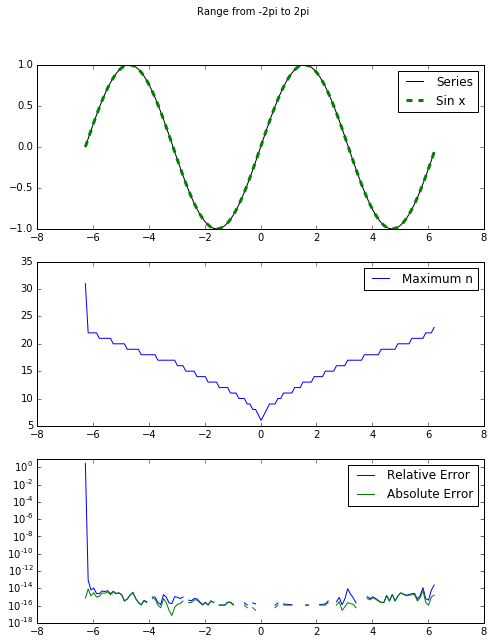

In [104]:
fig = graph.figure(figsize=(8, 10))
    
values = fig.add_subplot(3,1,1)
values.plot(xaxis, testvalues[:, 0], 'k-', lw=1, label="Series")
values.plot(xaxis, np.sin(xaxis), 'g--', lw=3, label="Sin x")
values.legend(loc="best")

rerror = fig.add_subplot(3,1,2)
rerror.plot(xaxis, testvalues[:, 1], label="Maximum n")
rerror.legend(loc="best")

aerror = fig.add_subplot(3,1,3)
aerror.semilogy(xaxis, relative, label="Relative Error")
aerror.semilogy(xaxis, absolute, label="Absolute Error")
aerror.legend(loc="best")
    
fig.suptitle("Range from -2pi to 2pi")

#### ii)

In [216]:
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)

In [217]:
testvalues = np.array([sin_series(x) for x in xaxis])
relative = np.array([rel_error(x) for x in xaxis])
absolute = np.array([abs_error(x) for x in xaxis])

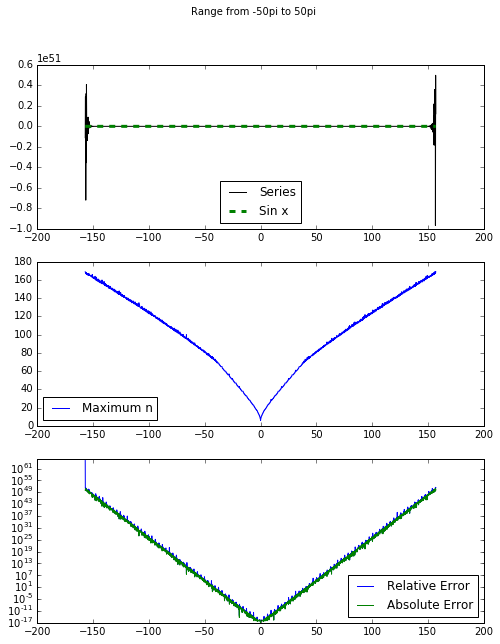

In [107]:
fig = graph.figure(figsize=(8, 10))
    
values = fig.add_subplot(3,1,1)
values.plot(xaxis, testvalues[:, 0], 'k-', lw=1, label="Series")
values.plot(xaxis, np.sin(xaxis), 'g--', lw=3, label="Sin x")
values.legend(loc="best")

rerror = fig.add_subplot(3,1,2)
rerror.plot(xaxis, testvalues[:, 1], label="Maximum n")
rerror.legend(loc="best")

aerror = fig.add_subplot(3,1,3)
aerror.semilogy(xaxis, relative, label="Relative Error")
aerror.semilogy(xaxis, absolute, label="Absolute Error")
aerror.legend(loc="best")
    
fig.suptitle("Range from -50pi to 50pi")

#### iii)

|X|Max n|sin_series|$\delta $|$\Delta$|
|-|-|-|-|-|
|-156.979632679 | 168 | 1.889712830799499e+50 | 1.07685009344e+51 | 1.07505624044e+50 |
|0|1|0|0|0|
|0.1|7|0.09983341664682817|1.39240624616e-16|1.38777878078e-17|
|2pi|31|4.3878919606925197e-16|0|0|
|-2pi|31|-4.3878919606925197e-16|0|0|

In [222]:
x = -2*np.pi
y, n = sin_series(x)
print(x, n, y, rel_error(y), abs_error(y))

-6.283185307179586 31 -4.3878919606925197e-16 0.0 0.0


### b)

In [178]:
index = 0
values = []
while (index < (np.size(relative))):
    index += 1
    if (relative[index-1] < 1e-16):
        values.append(index)
index = 0

while index < len(values):
    print(xaxis[values[index]], sin_series(xaxis[values[index]]) , np.sin(xaxis[values[index]]))
    index += 1

-1.9796326795 (-0.91758404245362868, 14) -0.917584042454
-1.7796326795 (-0.97827282630472379, 13) -0.978272826305
-1.6796326795 (-0.99408316820534959, 13) -0.994083168205
-1.5796326795 (-0.99996095968947574, 13) -0.999960959689
-1.4796326795 (-0.9958474718075323, 12) -0.995847471808
-1.0796326795 (-0.88178461881896375, 11) -0.881784618819
-0.879632679499 (-0.77050478823071988, 11) -0.770504788231
-0.579632679499 (-0.5477166499478926, 10) -0.547716649948
-0.279632679499 (-0.27600261456300251, 8) -0.276002614563
-0.179632679499 (-0.17866817539767421, 8) -0.178668175398
0.120367320501 (0.12007687817059023, 7) 0.120076878171
0.420367320501 (0.40809582183098503, 9) 0.408095821831
0.520367320501 (0.49719887209213898, 9) 0.497198872092
0.620367320501 (0.58133407557544492, 10) 0.581334075575
1.0203673205 (0.85230020750358315, 11) 0.852300207504
1.2203673205 (0.93922552109036417, 12) 0.93922552109
1.4203673205 (0.98870687704880122, 12) 0.988706877049
1.5203673205 (0.99872872710926575, 13) 0.998

The code above prints the values of the series implementation of sine where the absolute error is less than $10^{-16}$. This means that the algorithm found the correct answer. The first column is the x value, the second is the
result of the approximation, the third is the max n values and the final column is the sine value calculated with the numpy function. It shows roughly, that for values between -2 and 3, the series approximation is accurate. The graphs above also support the same conclusion.

### c)

The values shown in part (b) have a precision greater than the value expected in equation 2. They were specifically selected for that property.

### d)

The algorithm sin_series was written so that it only generates values that converge. The graphs from part (a) show that as the x-values get farther from zero, the error begins to grow quickly. Additionally, the maximum value of n needed to for the algorithm also grows as the x-values get farther from zero.

### e)

In [223]:
def sin_series(x, eps=1e-16):
    """Calculate sin(x) to precision eps using the identity sin(x) = sin(x + 2npi)"""
    #Code in this method is taken from 04_numbers_and_errors notebook all other methods are based on formulas given.
    x = x % (2*np.pi) #this line improves the algorithm by using modular arithmetic to reduce the x value.
    if x == 0:
        return 0., 1
    a_n = sumN = x   # a_1 is the sum
    n = 2            # start with calculating a_2
    while abs(a_n/sumN) > eps:
        a_n *= -x*x/((2*n - 1)*(2*n - 2)) 
        sumN += a_n
        n += 1
    return sumN, n

def rel_error(x):
    """Calculates relative error between two arrays"""
    y, n = sin_series(x)
    if np.sin(x) == 0:
        return 0
    return np.abs((y - np.sin(x))/np.sin(x))

def abs_error(x):
    """Calculates absolute error between two arrays"""
    y, n  = sin_series(x)
    return np.abs(y - np.sin(x))

In [224]:
xaxis = np.arange(-50*np.pi, 50*np.pi, 0.1)

In [225]:
testvalues = np.array([sin_series(x) for x in xaxis])
relative = np.array([rel_error(x) for x in xaxis])
absolute = np.array([abs_error(x) for x in xaxis])


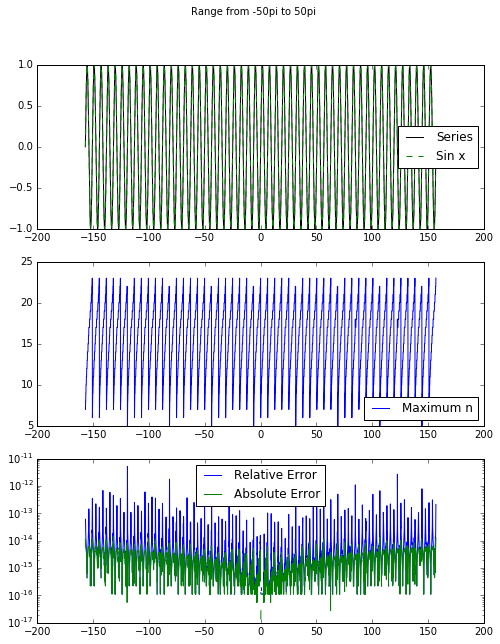

In [226]:
fig = graph.figure(figsize=(8, 10))
    
values = fig.add_subplot(3,1,1)
values.plot(xaxis, testvalues[:, 0], 'k-', lw=1, label="Series")
values.plot(xaxis, np.sin(xaxis), 'g--', lw=1, label="Sin x")
values.legend(loc="best")

rerror = fig.add_subplot(3,1,2)
rerror.plot(xaxis[1:], testvalues[1:, 1], label="Maximum n") #The first value is removed from the plot 
                                                             #because it is a large outlier
rerror.legend(loc="best")

aerror = fig.add_subplot(3,1,3)
aerror.semilogy(xaxis[1:], relative[1:], label="Relative Error")#The first value is removed from the plot 
                                                                #because it is a large outlier
aerror.semilogy(xaxis, absolute, label="Absolute Error")
aerror.legend(loc="best")
    
fig.suptitle("Range from -50pi to 50pi")

|X|Max n|sin_series|$\delta $|$\Delta$|
|-|-|-|-|-|
|-156.979632679 | 7 | 0.09983341713404671 | 1.39240623939e-16 | 1.38777878078e-17 |
|0|1|0|0|0|
|45 |11| 0.8509035245341194 |0.0 |0.0|
|29485|18|-0.9139634058859746|2.80384111304e-15|2.22044604925e-15|
|-98723|19|-0.9997654905475702|3.95874703062e-15|3.33066907388e-15|

In [233]:
x = -98723
y, n = sin_series(x)
print(x, n, y, rel_error(y), abs_error(y))

-98723 19 -0.9997654905475702 3.95874703062e-15 3.33066907388e-15


The values in the table show that the algorithm is much improved by implementing the sine identity. Without it the errors kept increasing as the x values moved farther from zero.

### f)

In [251]:
import math
def bad_sin(x, eps=1e-16):
    """Calculate sin(x) to precision eps using the factorial method"""
    if x == 0:
        return 0., 1
    a_n = sumN = x   # a_1 is the sum
    n = 2            # start with calculating a_2
    while abs(a_n/sumN) > eps:
        a_n = (((-1)**n)*(x**(2*n - 1)))/math.factorial(2*n - 1)
        sumN += a_n
        n += 1
    return sumN, n

In [256]:
xaxis = np.arange(-2*np.pi, 2*np.pi, 0.1)

In [257]:
testvalues = np.array([sin_series(x) for x in xaxis])
badvalues = np.array([bad_sin(x) for x in xaxis])
relative = np.array([rel_error(x) for x in xaxis])
absolute = np.array([abs_error(x) for x in xaxis])

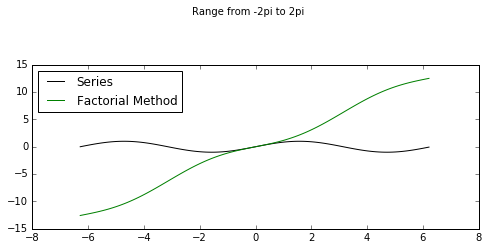

In [262]:
fig = graph.figure(figsize=(8, 10))
    
values = fig.add_subplot(3,1,1)
values.plot(xaxis, testvalues[:, 0], 'k-', lw=1, label="Series")
values.plot(xaxis, badvalues[:, 0], 'g-', label="Factorial Method")
values.legend(loc="best")

fig.suptitle("Range from -2pi to 2pi")

|x|Factorial Approximation|Good Approximation|Numpy Value
|-|-|-|-|
|2 | 3.090702573174318 | 0.9092974268256817 |0.909297426826|
|$\pi$|6.283185307179586|2.479060685682187e-16|1.22464679915e-16|
|0 |0| 0 |0|
|100|-3.6809887034272275e+25|-0.5063656411097542|-0.50636564111|
|-0.5|-0.5205744613957969|-0.47942553860420284|-0.479425538604|


Both the graph and the table above show that the factorial implementation of the sine function is very inaccurate once the x-values are greater than 1/2 or smaller than -1/2. The error grows extremely quickly and large numbers are impossible to computer because the computer is incapable of calculating the large factorials and powers necessary.